# Sarcasm Detection
 **Acknowledgement**

Misra, Rishabh, and Prahal Arora. "Sarcasm Detection using Hybrid Neural Network." arXiv preprint arXiv:1908.07414 (2019).

**Required Files given in below link.**

https://drive.google.com/drive/folders/1xUnF35naPGU63xwRDVGc-DkZ3M8V5mMk

## Install `Tensorflow2.0` 

In [169]:
!!pip uninstall tensorflow
!pip install tensorflow==2.0.0

  Using cached https://files.pythonhosted.org/packages/46/0f/7bd55361168bb32796b360ad15a25de6966c9c1beb58a8e30c01c8279862/tensorflow-2.0.0-cp36-cp36m-manylinux2010_x86_64.whl


## Get Required Files from Drive

In [170]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [171]:
#Set your project path 
project_path = "/content/drive/My Drive/Colab Notebooks/"  ## Add your path here ##

#**## Reading and Exploring Data**

## Read Data "Sarcasm_Headlines_Dataset.json". Explore the data and get  some insights about the data. ( 4 marks)
Hint - As its in json format you need to use pandas.read_json function. Give paraemeter lines = True.

In [172]:
import pandas as pd
import numpy as np

In [173]:
df = pd.read_json("/content/drive/My Drive/Colab Notebooks/Sarcasm_Headlines_Dataset.json",lines=True)

In [174]:
df.head()

,article_link,headline,is_sarcastic
0,https://www.huffingtonpost.com/entry/versace-b...,former versace store clerk sues over secret 'b...,0
1,https://www.huffingtonpost.com/entry/roseanne-...,the 'roseanne' revival catches up to our thorn...,0
2,https://local.theonion.com/mom-starting-to-fea...,mom starting to fear son's web series closest ...,1
3,https://politics.theonion.com/boehner-just-wan...,"boehner just wants wife to listen, not come up...",1
4,https://www.huffingtonpost.com/entry/jk-rowlin...,j.k. rowling wishes snape happy birthday in th...,0


In [175]:
df["is_sarcastic"].value_counts()

0    14985
1    11724
Name: is_sarcastic, dtype: int64

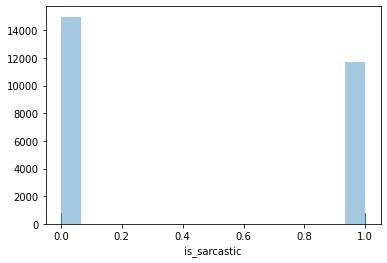

In [176]:
import seaborn as sns
sns.distplot(df["is_sarcastic"],kde=False, rug=True)

In [177]:
df.isnull().sum()

article_link    0
headline        0
is_sarcastic    0
dtype: int64

In [178]:
space_count = [df["is_sarcastic"]==""]

/usr/local/lib/python3.6/dist-packages/pandas/core/ops/array_ops.py:253: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  res_values = method(rvalues)


In [179]:
sum(space_count).value_counts()

0    26709
Name: is_sarcastic, dtype: int64

In [180]:
space2_count = [df["is_sarcastic"]==" "]

/usr/local/lib/python3.6/dist-packages/pandas/core/ops/array_ops.py:253: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  res_values = method(rvalues)


In [181]:
sum(space2_count).value_counts()

0    26709
Name: is_sarcastic, dtype: int64

In [182]:
df.shape

(26709, 3)

In [183]:
df.isna().sum()

article_link    0
headline        0
is_sarcastic    0
dtype: int64

Data Insight can be seen above: There is unequal distribution of sarcastice and non-sarcastic comments.

## Drop `article_link` from dataset. ( 2 marks)
As we only need headline text data and is_sarcastic column for this project. We can drop artical link column here.

In [184]:
df1 = df.drop("article_link", axis=1)

In [185]:
df1.head()

,headline,is_sarcastic
0,former versace store clerk sues over secret 'b...,0
1,the 'roseanne' revival catches up to our thorn...,0
2,mom starting to fear son's web series closest ...,1
3,"boehner just wants wife to listen, not come up...",1
4,j.k. rowling wishes snape happy birthday in th...,0


In [186]:
df1.shape

(26709, 2)

In [187]:
df1["is_sarcastic"].value_counts()

0    14985
1    11724
Name: is_sarcastic, dtype: int64

## Get the Length of each line and find the maximum length. ( 4 marks)
As different lines are of different length. We need to pad the our sequences using the max length.

In [188]:
len(df1["headline"][0])

78

In [189]:
df1.tail(5)

,headline,is_sarcastic
26704,american politics in moral free-fall,0
26705,america's best 20 hikes,0
26706,reparations and obama,0
26707,israeli ban targeting boycott supporters raise...,0
26708,gourmet gifts for the foodie 2014,0


In [190]:
df1["headline"][26708]

'gourmet gifts for the foodie 2014'

In [191]:
max = 0
result = []
for i in range(0,26709):
  a = len(df1["headline"][i])
  if (a > max):
      max = a
  result.append(a)

In [192]:
print("The maximum length is", max)

The maximum length is 254


In [193]:
result

[78,
 84,
 79,
 84,
 64,
 27,
 46,
 67,
 50,
 59,
 63,
 59,
 70,
 64,
 51,
 64,
 88,
 50,
 58,
 20,
 50,
 111,
 66,
 42,
 71,
 37,
 58,
 22,
 57,
 40,
 55,
 51,
 65,
 59,
 65,
 34,
 33,
 86,
 67,
 71,
 64,
 82,
 56,
 53,
 41,
 41,
 92,
 71,
 38,
 33,
 28,
 52,
 65,
 69,
 88,
 67,
 72,
 49,
 66,
 68,
 28,
 28,
 41,
 88,
 69,
 60,
 71,
 81,
 43,
 42,
 39,
 50,
 39,
 54,
 80,
 63,
 58,
 64,
 32,
 57,
 59,
 59,
 68,
 85,
 61,
 64,
 104,
 53,
 87,
 76,
 29,
 113,
 79,
 42,
 62,
 49,
 73,
 54,
 65,
 44,
 51,
 67,
 47,
 55,
 28,
 68,
 37,
 64,
 41,
 63,
 69,
 77,
 43,
 118,
 40,
 71,
 57,
 107,
 85,
 69,
 52,
 22,
 56,
 60,
 58,
 65,
 76,
 58,
 36,
 82,
 60,
 57,
 33,
 58,
 42,
 58,
 61,
 63,
 76,
 61,
 61,
 59,
 54,
 47,
 67,
 52,
 57,
 48,
 62,
 73,
 43,
 67,
 32,
 77,
 51,
 62,
 50,
 66,
 49,
 88,
 47,
 43,
 54,
 80,
 85,
 84,
 57,
 91,
 60,
 48,
 48,
 64,
 75,
 40,
 61,
 36,
 70,
 25,
 59,
 50,
 81,
 97,
 63,
 47,
 57,
 48,
 90,
 61,
 67,
 66,
 65,
 72,
 43,
 40,
 56,
 90,
 40,
 43,
 63,


In [194]:
max_2 = 0
result_2 = []
for i in range(0,df1["headline"].shape[0]):
   b = (len(df1["headline"][i].split()))
   if (b > max_2):
      max_2 = b
   result_2.append(b)

In [195]:
print("The maximum length is", max_2)

The maximum length is 39


In [196]:
df2 = df1

In [197]:
df2["length"]=result

In [198]:
df2["word_count"]=result_2

In [199]:
df2.head()

,headline,is_sarcastic,length,word_count
0,former versace store clerk sues over secret 'b...,0,78,12
1,the 'roseanne' revival catches up to our thorn...,0,84,14
2,mom starting to fear son's web series closest ...,1,79,14
3,"boehner just wants wife to listen, not come up...",1,84,13
4,j.k. rowling wishes snape happy birthday in th...,0,64,11


In [200]:
df2.loc[df2['length'] > 200] 

,headline,is_sarcastic,length,word_count
15247,"elmore leonard, modern prose master, noted for...",1,237,39
17306,"'12 years a slave,' 'captain phillips,' 'ameri...",1,238,31
19868,"maya angelou, poet, author, civil rights activ...",1,254,29
21783,occasionally you realize someone you thought w...,0,228,38


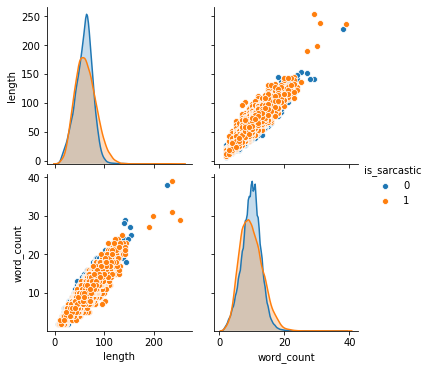

In [201]:
sns.pairplot(df2, hue = "is_sarcastic")

#**## Modelling**

## Import required modules required for modelling.

In [202]:
import numpy as np
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Dense, Input, LSTM, Embedding, Dropout, Activation, Flatten, Bidirectional, GlobalMaxPool1D
from tensorflow.keras.models import Model, Sequential

# Set Different Parameters for the model. ( 2 marks)

In [203]:
max_features = 10000
maxlen = 39
embedding_size = 200

## Apply Keras Tokenizer of headline column of your data.  ( 4 marks)
Hint - First create a tokenizer instance using Tokenizer(num_words=max_features) 
And then fit this tokenizer instance on your data column df['headline'] using .fit_on_texts()

In [204]:
df3 = df.drop("article_link", axis=1)

In [205]:
df3.head()

,headline,is_sarcastic
0,former versace store clerk sues over secret 'b...,0
1,the 'roseanne' revival catches up to our thorn...,0
2,mom starting to fear son's web series closest ...,1
3,"boehner just wants wife to listen, not come up...",1
4,j.k. rowling wishes snape happy birthday in th...,0


In [206]:
import tensorflow as tf
t = tf.keras.preprocessing.text.Tokenizer(num_words=max_features)
t.fit_on_texts(df3["headline"].tolist())

In [207]:
t.word_index

{'to': 1,
 'of': 2,
 'the': 3,
 'in': 4,
 'for': 5,
 'a': 6,
 'on': 7,
 'and': 8,
 'with': 9,
 'is': 10,
 'new': 11,
 'trump': 12,
 'man': 13,
 'from': 14,
 'at': 15,
 'about': 16,
 'you': 17,
 'this': 18,
 'by': 19,
 'after': 20,
 'up': 21,
 'out': 22,
 'be': 23,
 'how': 24,
 'as': 25,
 'it': 26,
 'that': 27,
 'not': 28,
 'are': 29,
 'your': 30,
 'his': 31,
 'what': 32,
 'he': 33,
 'all': 34,
 'just': 35,
 'who': 36,
 'has': 37,
 'will': 38,
 'more': 39,
 'one': 40,
 'into': 41,
 'report': 42,
 'year': 43,
 'why': 44,
 'have': 45,
 'area': 46,
 'over': 47,
 'donald': 48,
 'u': 49,
 'day': 50,
 'says': 51,
 's': 52,
 'can': 53,
 'first': 54,
 'woman': 55,
 'time': 56,
 'like': 57,
 'her': 58,
 "trump's": 59,
 'old': 60,
 'no': 61,
 'get': 62,
 'off': 63,
 'an': 64,
 'life': 65,
 'people': 66,
 'obama': 67,
 'now': 68,
 'house': 69,
 'still': 70,
 "'": 71,
 'women': 72,
 'make': 73,
 'was': 74,
 'than': 75,
 'white': 76,
 'back': 77,
 'my': 78,
 'i': 79,
 'clinton': 80,
 'down': 81,
 'i

# Define X and y for your model.

In [208]:
X = t.texts_to_sequences(df3['headline'])
X = pad_sequences(X, maxlen = maxlen)
y = np.asarray(df3['is_sarcastic'])

print("Number of Samples:", len(X))
print(X[0])
print("Number of Labels: ", len(y))
print(y[0])

Number of Samples: 26709
[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0  307  678 3336 2297   47  381 2575    5 2576 8433]
Number of Labels:  26709
0


In [209]:
from sklearn.model_selection import train_test_split

In [210]:
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2, 
    random_state=42
)

In [211]:
X_train.shape, X_test.shape

((21367, 39), (5342, 39))

In [212]:
y_train.shape, y_test.shape

((21367,), (5342,))

## Get the Vocabulary size ( 2 marks)
Hint : You can use tokenizer.word_index.

In [213]:
t.word_index

{'to': 1,
 'of': 2,
 'the': 3,
 'in': 4,
 'for': 5,
 'a': 6,
 'on': 7,
 'and': 8,
 'with': 9,
 'is': 10,
 'new': 11,
 'trump': 12,
 'man': 13,
 'from': 14,
 'at': 15,
 'about': 16,
 'you': 17,
 'this': 18,
 'by': 19,
 'after': 20,
 'up': 21,
 'out': 22,
 'be': 23,
 'how': 24,
 'as': 25,
 'it': 26,
 'that': 27,
 'not': 28,
 'are': 29,
 'your': 30,
 'his': 31,
 'what': 32,
 'he': 33,
 'all': 34,
 'just': 35,
 'who': 36,
 'has': 37,
 'will': 38,
 'more': 39,
 'one': 40,
 'into': 41,
 'report': 42,
 'year': 43,
 'why': 44,
 'have': 45,
 'area': 46,
 'over': 47,
 'donald': 48,
 'u': 49,
 'day': 50,
 'says': 51,
 's': 52,
 'can': 53,
 'first': 54,
 'woman': 55,
 'time': 56,
 'like': 57,
 'her': 58,
 "trump's": 59,
 'old': 60,
 'no': 61,
 'get': 62,
 'off': 63,
 'an': 64,
 'life': 65,
 'people': 66,
 'obama': 67,
 'now': 68,
 'house': 69,
 'still': 70,
 "'": 71,
 'women': 72,
 'make': 73,
 'was': 74,
 'than': 75,
 'white': 76,
 'back': 77,
 'my': 78,
 'i': 79,
 'clinton': 80,
 'down': 81,
 'i

#**## Word Embedding**

## Get Glove Word Embeddings

In [214]:
glove_file = project_path + "glove.6B.zip"

In [215]:
#Extract Glove embedding zip file
from zipfile import ZipFile
with ZipFile(glove_file, 'r') as z:
  z.extractall()

# Get the Word Embeddings using Embedding file as given below.

In [216]:
EMBEDDING_FILE = './glove.6B.200d.txt'

embeddings = {}
for o in open(EMBEDDING_FILE):
    word = o.split(" ")[0]
    # print(word)
    embd = o.split(" ")[1:]
    embd = np.asarray(embd, dtype='float32')
    # print(embd)
    embeddings[word] = embd



# Create a weight matrix for words in training docs

In [217]:
num_words = len(t.word_index) + 1

In [218]:
print(num_words)

29657


In [219]:
embedding_matrix = np.zeros((num_words, 200))

for word, i in t.word_index.items():
    embedding_vector = embeddings.get(word)
    if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector

len(embeddings.values())

400000

## Create and Compile your Model  ( 7 marks)
Hint - Use Sequential model instance and then add Embedding layer, Bidirectional(LSTM) layer, then dense and dropout layers as required. 
In the end add a final dense layer with sigmoid activation for binary classification.


In [220]:
### Embedding layer for hint 
## model.add(Embedding(num_words, embedding_size, weights = [embedding_matrix]))
### Bidirectional LSTM layer for hint 
## model.add(Bidirectional(LSTM(128, return_sequences = True)))

In [221]:
model = tf.keras.Sequential()

In [222]:
model.add(Embedding(num_words, 200, weights = [embedding_matrix]))

In [223]:
model.add(Bidirectional(LSTM(128, return_sequences = True)))

In [224]:
model.add(tf.keras.layers.Dense(128,activation='sigmoid'))

In [225]:
model.add(tf.keras.layers.Dropout(0.2))

In [226]:
model.add(tf.keras.layers.Dense(128,activation='sigmoid'))

In [228]:
model.add(tf.keras.layers.Dense(1,activation='sigmoid'))

In [229]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [241]:
history = model.fit(X_train,y_train,
          epochs=20,
          batch_size=200,          
          validation_data=(X_test, y_test))

Train on 21367 samples, validate on 5342 samples
Epoch 1/20
21367/21367 [==============================] - 79s 4ms/sample - loss: 0.0088 - accuracy: 0.9985 - val_loss: 0.8780 - val_accuracy: 0.8432
Epoch 2/20
21367/21367 [==============================] - 79s 4ms/sample - loss: 0.0080 - accuracy: 0.9988 - val_loss: 0.9005 - val_accuracy: 0.8428
Epoch 3/20
21367/21367 [==============================] - 79s 4ms/sample - loss: 0.0078 - accuracy: 0.9988 - val_loss: 0.9186 - val_accuracy: 0.8432
Epoch 4/20
21367/21367 [==============================] - 80s 4ms/sample - loss: 0.0078 - accuracy: 0.9988 - val_loss: 0.9282 - val_accuracy: 0.8432
Epoch 5/20
21367/21367 [==============================] - 79s 4ms/sample - loss: 0.0078 - accuracy: 0.9988 - val_loss: 0.9320 - val_accuracy: 0.8431
Epoch 6/20
21367/21367 [==============================] - 79s 4ms/sample - loss: 0.0076 - accuracy: 0.9988 - val_loss: 0.9461 - val_accuracy: 0.8433
Epoch 7/20
21367/21367 [==============================] -

model accuracy : 0.84240496


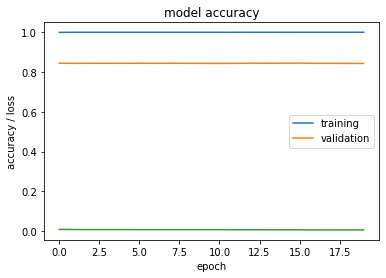

In [242]:
loss,accuracy1  = model.evaluate(X_test, y_test, verbose=False)
print("model accuracy :" , accuracy1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.plot(history.history['loss'])
plt.title('model accuracy')
plt.ylabel('accuracy / loss')
plt.xlabel('epoch')
plt.legend(['training', 'validation'], loc='best')
plt.show()

# Fit your model with a batch size of 100 and validation_split = 0.2. and state the validation accuracy ( 5 marks)


In [231]:
batch_size = 100
epochs = 5

## Add your code here ##

In [234]:
history1 = model.fit(X_train,y_train,
          epochs=5,
          batch_size=100,          
          validation_data=(X_test, y_test))

Train on 21367 samples, validate on 5342 samples
Epoch 1/5
21367/21367 [==============================] - 104s 5ms/sample - loss: 0.1423 - accuracy: 0.9592 - val_loss: 0.4838 - val_accuracy: 0.8415
Epoch 2/5
21367/21367 [==============================] - 104s 5ms/sample - loss: 0.0571 - accuracy: 0.9823 - val_loss: 0.5991 - val_accuracy: 0.8472
Epoch 3/5
21367/21367 [==============================] - 104s 5ms/sample - loss: 0.0252 - accuracy: 0.9940 - val_loss: 0.6991 - val_accuracy: 0.8468
Epoch 4/5
21367/21367 [==============================] - 104s 5ms/sample - loss: 0.0153 - accuracy: 0.9970 - val_loss: 0.7945 - val_accuracy: 0.8449
Epoch 5/5
21367/21367 [==============================] - 104s 5ms/sample - loss: 0.0109 - accuracy: 0.9983 - val_loss: 0.8517 - val_accuracy: 0.8441


In [236]:
%matplotlib inline
import matplotlib.pyplot as plt

model accuracy : 0.8440945


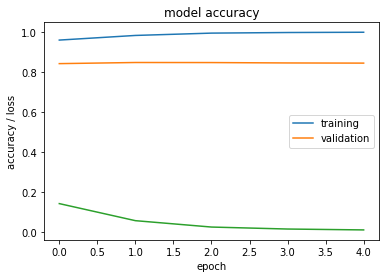

In [240]:
loss,accuracy1  = model.evaluate(X_test, y_test, verbose=False)
print("model accuracy :" , accuracy1)
plt.plot(history1.history['accuracy'])
plt.plot(history1.history['val_accuracy'])
plt.plot(history1.history['loss'])
plt.title('model accuracy')
plt.ylabel('accuracy / loss')
plt.xlabel('epoch')
plt.legend(['training', 'validation'], loc='best')
plt.show()